In [50]:
!pip install pandas numpy matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 5.3 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 6.5 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 7.0 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 7.4 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----------- ---------------------------- 2/7 [importlib-resources]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------

In [117]:
#импортируем датасет
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [119]:
#смотрим на варианты количества дверей
train_df['Doors'].value_counts()

Doors
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

In [120]:
#смотрим на engine volume
train_df['Engine volume'].value_counts()

Engine volume
2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
5.4 Turbo       1
0.3 Turbo       1
5.2             1
5.8             1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [122]:
#дублируем датасет
train_clean = train_df.copy()

#заменяем levy(налог) '-' меняем на NaN
train_clean['Levy'] = train_clean['Levy'].replace('-', np.nan).astype(float)

#удаляем km в mileage(пробег) и меняем на int
train_clean['Mileage'] = train_clean['Mileage'].str.replace(' km', '').astype(int)

#преобразуем doors в int
train_clean['Doors'] = train_clean['Doors'].replace('>5', '05').str[:2].astype(int)

#преобразуем стоблец engine volume
train_clean['Engine volume'] = train_clean['Engine volume'].str.replace('Turbo', '').str.strip().astype(float)

train_clean

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4


In [123]:
#проверяем все колонки на пропуски
train_clean.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [124]:
#разделяем данные на train и val
from sklearn.model_selection import train_test_split

X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    train_clean.drop('Price', axis=1),  #все признаки кроме цены
    train_clean['Price'],               #целевая переменная
    test_size=0.2,
    random_state=42
)

In [125]:
#заменяем пропуски в levy медианой, но добавляем маркер того, что признак отсутствовал 
#находим позицию после Levy
levy_pos_train = X_train_raw.columns.get_loc('Levy') + 1

#создаем признак пропуска и вставляем на нужное место
X_train_raw.insert(levy_pos_train, 'Levy_missing', X_train_raw['Levy'].isnull().astype(int))

#заполняем пропуски в Levy медианой
median_levy_train = X_train_raw['Levy'].median()
X_train_raw['Levy'] = X_train_raw['Levy'].fillna(median_levy_train)

#создаем колонку возраст авто и удаляем колонки id и prod.year
X_train_raw['Age'] = 2025 - X_train_raw['Prod. year']

#удаляем столбцы
X_train_raw.drop(['ID', 'Prod. year'], axis=1, inplace=True)

#делаем то же самое с x_val_raw
levy_pos_val = X_val_raw.columns.get_loc('Levy') + 1
X_val_raw.insert(levy_pos_val, 'Levy_missing', X_val_raw['Levy'].isnull().astype(int))
X_val_raw['Levy'] = X_val_raw['Levy'].fillna(median_levy_train)  # Используем медиану из TRAIN!
X_val_raw['Age'] = 2025 - X_val_raw['Prod. year']
X_val_raw.drop(['ID', 'Prod. year'], axis=1, inplace=True)

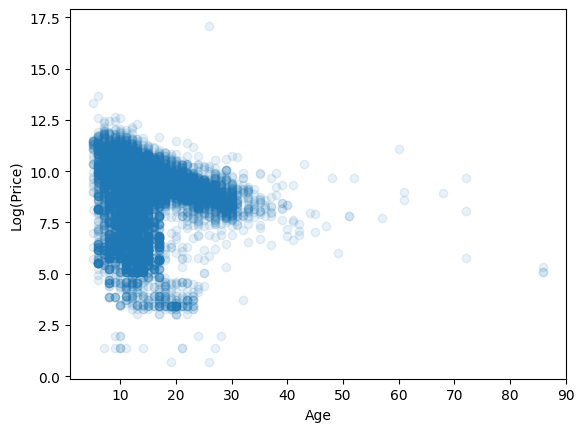

In [128]:
#построим график зависимости цены от возраста автомобиля. будем использовать логарифм цены,
#чтобы избежать перекоса графика
import matplotlib.pyplot as plt

#точечный график для самой важной связи
plt.scatter(X_train_raw['Age'], np.log1p(y_train), alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Log(Price)')
plt.show()

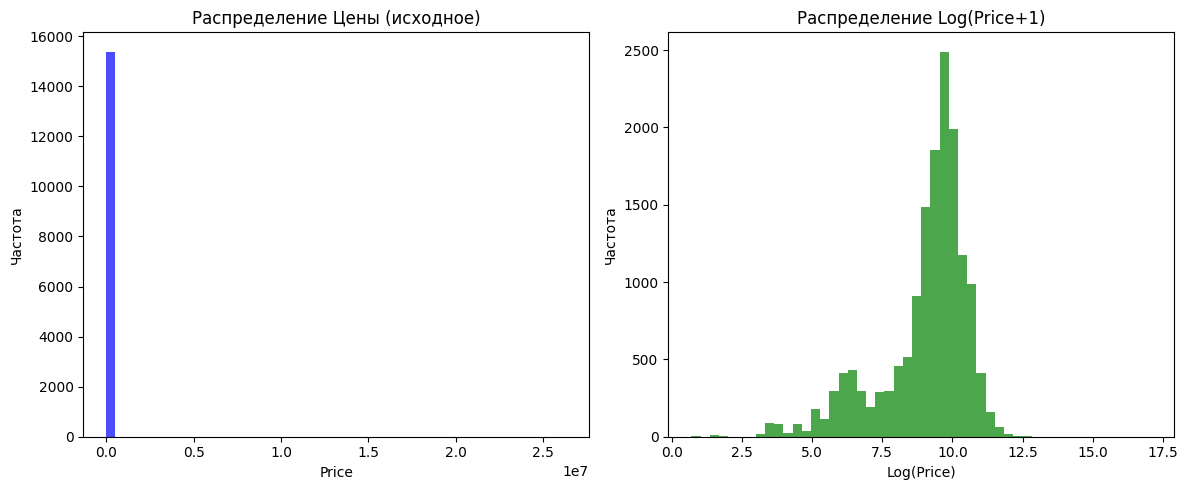

In [132]:
#построим гистограмму чтобы оценить распределение цены и сравним его с логарифмированной ценой
plt.figure(figsize=(12, 5))

#гистограмма исходной цены
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50, alpha=0.7, color='blue')
plt.title('Распределение Цены (исходное)')
plt.xlabel('Price')
plt.ylabel('Частота')

#гистограмма логарифмированной цены
plt.subplot(1, 2, 2)
plt.hist(np.log1p(y_train), bins=50, alpha=0.7, color='green')  # y_train вместо train_clean['Price']
plt.title('Распределение Log(Price+1)')
plt.xlabel('Log(Price)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [42]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.2 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.2 MB 7.3 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.2 MB 7.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.2 MB 6.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.2 MB 6.1 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.2 MB 5.8 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.2 MB 5.7 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.2 MB 5.6 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.2 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
    --------------------------------------- 1.0/46.2 MB 5.0 MB/s eta 0:00:09
   - ------

In [134]:
#разделим данные на train и val
#закодируем категориальные признаки с помощью onehotencoder, 
#а числовые признаки прогоним через standardscaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# #используем train_test_split
# X_train_raw, X_val_raw, y_train, y_val = train_test_split(
#     car_features, 
#     car_prices, 
#     test_size=0.2, 
#     random_state=42
# )

#отделим числовые признаки от категориальных
numeric_features = X_train_raw.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_raw.select_dtypes(include=['object']).columns

#создадим пайплайн обработки
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)  # sparse_output=False для наглядности
])

#применяем пайплайн
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_val_processed = preprocessor.transform(X_val_raw)


In [135]:
#смотрим размерность train и val
X_train_processed.shape

(15389, 1519)

In [136]:
X_val_processed.shape

(3848, 1519)

In [137]:
#данные полностью готовы, можно приступать к обучению моделей
X_train_processed

array([[-0.23705884, -0.65620372,  0.21809968, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.11267252, -0.65620372, -0.35007746, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.42662593, -0.65620372,  1.35445397, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.12787847, -0.65620372,  0.78627683, ...,  0.        ,
         1.        ,  0.        ],
       [-0.23169211,  1.52391698,  0.21809968, ...,  0.        ,
         1.        ,  0.        ],
       [-0.23169211,  1.52391698, -0.1228066 , ...,  0.        ,
         0.        ,  0.        ]])

In [138]:
#обучаем линейную регрессию
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [139]:
#возьмем первые 5 значений и проверим совпадение с реальными данными
first_five_data = X_val_raw.iloc[:5]
first_five_prices = y_val.iloc[:5]
first_five_prepared = preprocessor.transform(first_five_data)
print('Прогнзы', lin_reg.predict(first_five_prepared))
print('Реальные цены', list(first_five_prices))

Прогнзы [ 10911.82563022  47964.99767509 -11340.72740618  42041.58471128
  21264.71832056]
Реальные цены [27284, 10349, 40769, 38737, 42102]


In [140]:
#смотрим на метрики 
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = lin_reg.predict(X_val_processed)
print('MAE:', mean_absolute_error(y_val, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_val, predictions)))

MAE: 14031.99395930208
RMSE: 42112.47613518117


In [141]:
#обучаем random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [142]:
#смотрим на метрики mae и rmse
forest_predictions = forest_reg.predict(X_val_processed)
print('MAE:', mean_absolute_error(y_val, forest_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_val, forest_predictions)))

MAE: 4155.893581214018
RMSE: 9038.912417396425


In [143]:
#проверим random forest на тех же 5 примерах, которые мы проверяли с линейной регрессией
print('Прогнозы:', forest_reg.predict(first_five_prepared))
print('Реальные цены:', list(first_five_prices))

Прогнозы: [23533.95       15487.81        5504.57       39684.42333333
 41801.11      ]
Реальные цены: [27284, 10349, 40769, 38737, 42102]


In [144]:
#в третьем значении есть сильная разница с реальной ценой
#посмотрим характеристики проблемного автомобиля
problem_car = X_val_raw.iloc[2:3]  #данные третьего автомобиля
print(problem_car)
#видимо здесь ошшибка в исходных данных датасета, поскольку mercedes c180 с 8 цилиндрами не существует.
#модель отработала верно

       Levy  Levy_missing   Manufacturer  Model Category Leather interior  \
5971  781.0             1  MERCEDES-BENZ  C 180    Sedan               No   

     Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
5971    Petrol            1.8   212485        8.0        Manual         Rear   

      Doors       Wheel  Color  Airbags  Age  
5971      4  Left wheel  Green        2   29  


In [145]:
#обучаем грдиентный бустинг
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_processed, y_train)

GradientBoostingRegressor(random_state=42)

In [146]:
#смотрим на метрики mae и rmse
gb_predictions = gb_reg.predict(X_val_processed)
print('MAE', mean_absolute_error(y_val, gb_predictions))
print('RMSE', np.sqrt(mean_squared_error(y_val, gb_predictions)))

MAE 7807.154433379025
RMSE 12743.548284675182


In [148]:
#ищем лучшие значения гиперпараметров для randomforest с помощью grigsearch
from sklearn.model_selection import GridSearchCV

rf_for_grid = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15, 20, 25], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

grid_search = GridSearchCV(rf_for_grid, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
#verbose=1 для вывода прогресса, n_jobs=1 для работы на всех ядрах процессора

grid_search.fit(X_train_processed, y_train)

#смотрим на лучшаю модель
best_forest = grid_search.best_estimator_
print('Лучшие параметры', grid_search.best_params_)
print('Лучашя MAE:', -grid_search.best_score_)
best_predictions = best_forest.predict(X_val_processed)
print('RMSE лучшей модели', np.sqrt(mean_squared_error(y_val, best_predictions)))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Лучшие параметры {'max_depth': 25, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Лучашя MAE: 7375.823020372797
RMSE лучшей модели 9755.686612607331


In [149]:
#пробуем применить randomized search
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators': [100, 400, 700],
    'max_features': ['sqrt', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    random_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',  
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random.fit(X_train_processed, y_train)
print("Лучшие параметры:", rf_random.best_params_)
print("Лучшая MAE:", -rf_random.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}
Лучшая MAE: 7383.671948414764


In [151]:
# Финализируем модель
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train_processed, y_train)

# Проверяем финальное качество
final_pred = final_model.predict(X_val_processed)
print("Финальная MAE:", mean_absolute_error(y_val, final_pred))

Финальная MAE: 4155.893581214018


Топ-10 важных признаков:
                            feature  importance
7                          num__Age    0.394205
6                      num__Airbags    0.152926
3                      num__Mileage    0.073369
2                num__Engine volume    0.038842
745       cat__Model_G 65 AMG 63AMG    0.026714
507                cat__Model_Combo    0.026347
37    cat__Manufacturer_LAMBORGHINI    0.024970
1517               cat__Color_White    0.022598
1353                cat__Model_Urus    0.021527
1488          cat__Fuel type_Diesel    0.021358


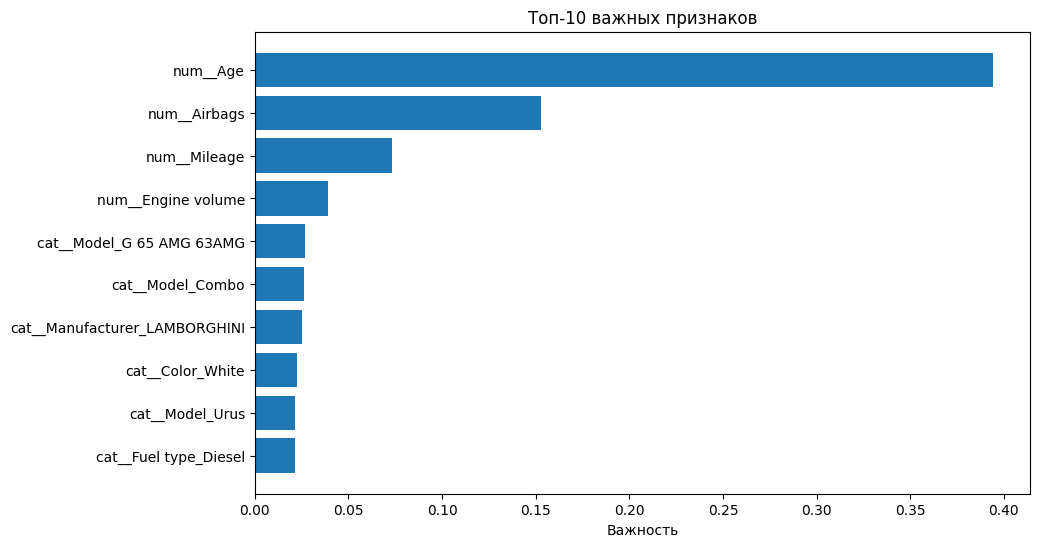

In [152]:
#смотрим важность признаков
feature_importances = final_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

#создаем DataFrame для наглядности
importance_df = pd.DataFrame({
    'feature': feature_names, 
    'importance': feature_importances
})
importance_df = importance_df.sort_values('importance', ascending=False)

#выводим топ-10 самых важных признаков
print("Топ-10 важных признаков:")
print(importance_df.head(10))

#визуализация
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'].head(10)[::-1], importance_df['importance'].head(10)[::-1])
plt.xlabel('Важность')
plt.title('Топ-10 важных признаков')
plt.show()

In [153]:
#преобразование тестовых данных
test_clean = test_df.copy()

#очистка данных (как на train наборе)
test_clean['Levy'] = test_clean['Levy'].replace('-', np.nan).astype(float)
test_clean['Mileage'] = test_clean['Mileage'].str.replace(' km', '').astype(int)
test_clean['Doors'] = test_clean['Doors'].replace('>5', '05').str[:2].astype(int)
test_clean['Engine volume'] = test_clean['Engine volume'].str.replace('Turbo', '').str.strip().astype(float)
test_clean['Turbo'] = test_df['Engine volume'].str.contains('Turbo').astype(int)

#создаем признаки (используя статистики из train набора)
test_clean['Levy_missing'] = test_clean['Levy'].isnull().astype(int)
test_clean['Levy'] = test_clean['Levy'].fillna(median_levy_train)
test_clean['Age'] = 2025 - test_clean['Prod. year']
test_clean.drop(['ID', 'Prod. year'], axis=1, inplace=True)

#применяем пайплайн
X_test_processed = preprocessor.transform(test_clean)
X_test_processed.shape

(8245, 1519)

In [157]:
#предсказание на тесте
test_predictions = final_model.predict(X_test_processed)

#сохраняем результаты
results = pd.DataFrame({
    'ID': test_df['ID'],
    'Price': test_predictions
})
results.to_csv('car_price_predictions.csv', index=False)

print("Файл car_price_predictions.csv сохранен!")
print("Примеры предсказаний:")
print(results.head(10))

Файл car_price_predictions.csv сохранен!
Примеры предсказаний:
         ID         Price
0  44020629  15990.810000
1  45784798  14056.750000
2  45800257   7751.230000
3  45797981   1579.792000
4  45814303   3266.220000
5  45812490  31089.770000
6  45772399    559.621640
7  45766222  13574.390769
8  45803362  15681.000000
9  45809004   9953.890000


In [158]:
#создаем понятную таблицу с предсказаниями
results_analysis = test_df.copy()
results_analysis['Predicted_Price'] = test_predictions

#выбираем самые информативные колонки для анализа
analysis_cols = ['Manufacturer', 'Model', 'Prod. year', 'Mileage', 'Engine volume', 'Fuel type', 'Predicted_Price']

#смотрим первые 10 примеров
print("\nПервые 10 предсказаний:")
print(results_analysis[analysis_cols].head(10).round(2))


Первые 10 предсказаний:
    Manufacturer    Model  Prod. year    Mileage Engine volume Fuel type  \
0     VOLKSWAGEN     Golf        2012       0 km     2.0 Turbo    Diesel   
1        HYUNDAI   Sonata        2012   26000 km           2.4    Petrol   
2         NISSAN    Tiida        2005  168000 km           1.5    Petrol   
3          VOLVO     XC90        2012  143000 km           3.2    Petrol   
4           OPEL    Astra        1993  200000 km           1.6    Petrol   
5            BMW      320        2014   59733 km     2.0 Turbo    Petrol   
6          LEXUS   GX 460        2015  102907 km           4.6    Petrol   
7  MERCEDES-BENZ    E 350        2011   64496 km           3.5    Diesel   
8        HYUNDAI   Sonata        2016  300234 km             2       LPG   
9         DAEWOO  Lacetti        2011  170000 km           1.8    Petrol   

   Predicted_Price  
0         15990.81  
1         14056.75  
2          7751.23  
3          1579.79  
4          3266.22  
5         31